58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/10
25/25 [==============================] - 645s 26s/step - loss: 5.3907 - accuracy: 0.1075 - val_loss: 2.4931 - val_accuracy: 0.0950
Epoch 2/10
25/25 [==============================] - 643s 26s/step - loss: 2.3931 - accuracy: 0.1138 - val_loss: 2.4176 - val_accuracy: 0.1150
Epoch 3/10
25/25 [==============================] - 642s 26s/step - loss: 2.3010 - accuracy: 0.1138 - val_loss: 2.3246 - val_accuracy: 0.1100
Epoch 4/10
25/25 [==============================] - 630s 25s/step - loss: 2.2672 - accuracy: 0.1488 - val_loss: 2.3300 - val_accuracy: 0.1100
Epoch 5/10
25/25 [==============================] - 631s 25s/step - loss: 2.2788 - accuracy: 0.1500 - val_loss: 2.3594 - val_accuracy: 0.0950
Epoch 6/10
25/25 [==============================] - 631s 25s/step - loss: 2.2672 - accuracy: 0.1462 - val_loss: 2.3369 - val_accuracy: 0.0850
Epoch 7/10
25/25 [==============================] - 631s 26s/step - loss: 2.2300 - 

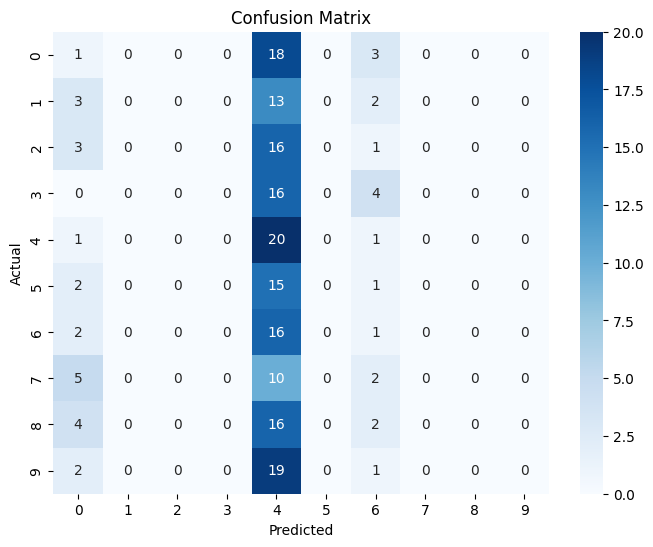

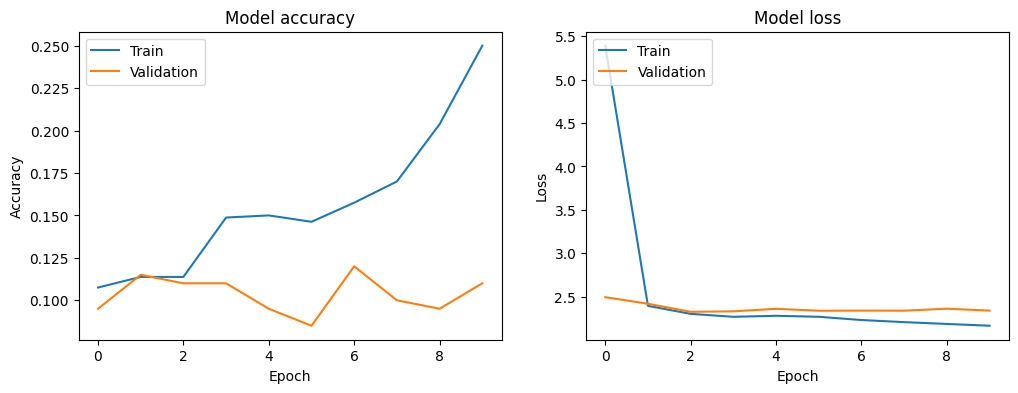

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


num_samples = 1000
num_classes = 10

X = np.random.random((num_samples, 224, 224, 3))

y = to_categorical(np.random.randint(num_classes, size=(num_samples, 1)), num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Epoch 1/10
19/19 [==============================] - 16s 628ms/step - loss: 8.3852 - accuracy: 0.1100 - val_loss: 2.9051 - val_accuracy: 0.0850
Epoch 2/10
19/19 [==============================] - 10s 541ms/step - loss: 2.4029 - accuracy: 0.1083 - val_loss: 2.3704 - val_accuracy: 0.0850
Epoch 3/10
19/19 [==============================] - 11s 566ms/step - loss: 2.1575 - accuracy: 0.1967 - val_loss: 2.3132 - val_accuracy: 0.1500
Epoch 4/10
19/19 [==============================] - 8s 443ms/step - loss: 1.9692 - accuracy: 0.4100 - val_loss: 2.3288 - val_accuracy: 0.1250
Epoch 5/10
19/19 [==============================] - 10s 531ms/step - loss: 1.7192 - accuracy: 0.5733 - val_loss: 2.3853 - val_accuracy: 0.0950
Epoch 6/10
19/19 [==============================] - 10s 549ms/step - loss: 1.4495 - accuracy: 0.5917 - val_loss: 2.3865 - val_accuracy: 0.0900
Epoch 7/10
19/19 [==============================] - 8s 432ms/step - loss: 1.1031 - accuracy: 0.8283 - val_loss: 2.4221 - val_accuracy: 0.1350
E

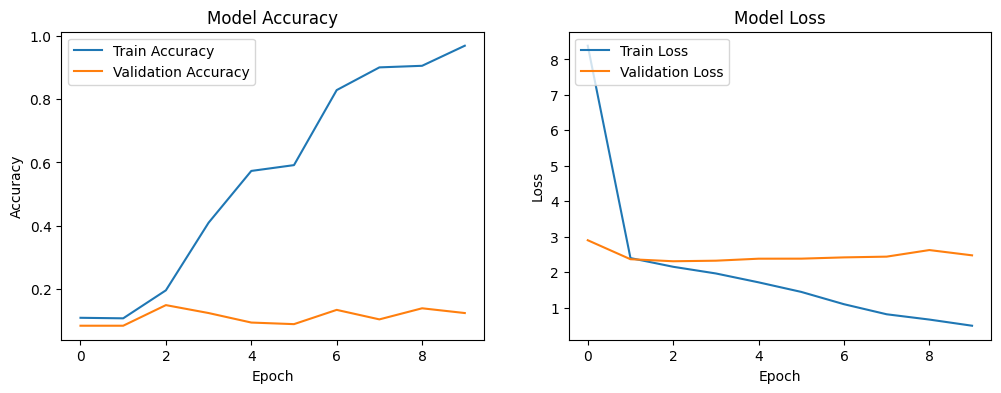

7/7 [==============================] - 1s 88ms/step


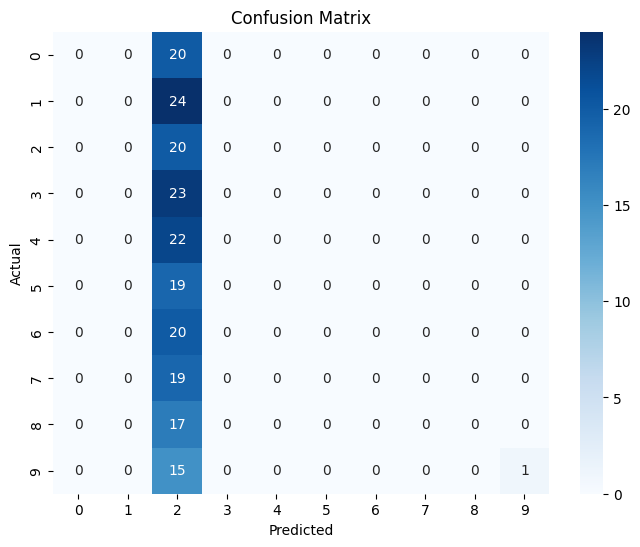

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, train_data, train_labels, val_data, val_labels):
    history = model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))
    return history

def evaluate_model(model, test_data, test_labels):
    loss, accuracy = model.evaluate(test_data, test_labels)
    print(f'Accuracy: {accuracy * 100:.2f}%')

def predict_image(model, image):
    prediction = model.predict(np.expand_dims(image, axis=0))
    return np.argmax(prediction)

def generate_synthetic_data(num_samples=1000, num_classes=10, image_shape=(128, 128, 3)):
    X = np.random.random((num_samples, *image_shape))
    y = to_categorical(np.random.randint(num_classes, size=(num_samples, 1)), num_classes=num_classes)
    return X, y

num_samples = 1000
num_classes = 10
image_shape = (128, 128, 3)

X, y = generate_synthetic_data(num_samples, num_classes, image_shape)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = build_model()

history = train_model(model, X_train, y_train, X_val, y_val)

evaluate_model(model, X_test, y_test)


image = np.random.random(image_shape)  # For demonstration, generate a random image
predicted_class = predict_image(model, image)
print(f'Predicted class: {predicted_class}')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
